In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.23.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.4 which is incompatible.
bayesian-optimization 2.0.3 requires numpy>=1.25, but you have numpy 1.23.4 which is incompatible.
bigframes 1.29.0 requires numpy>=1.24.0, but you have numpy 1.23.4 which is incompatible.
chex 0.1.88 requires numpy>=1.24.1, but you have numpy 1.23.4 which is incompatible.
featuretools 1.31.0 requires numpy>=1.25.0, but you have numpy 1.23.4 which is incompatible.
jax 0.4.33 requires numpy>=1.24, 

In [3]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as C
from tensorflow.keras import regularizers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model,Model
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling2D
#import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

2.17.1


In [4]:
train_path=("/kaggle/input/cards-image-datasetclassification/train")
val_path=("/kaggle/input/cards-image-datasetclassification/valid")
test_path=("/kaggle/input/cards-image-datasetclassification/test")
batch_size = 32
img_height = 640
img_width = 640
no_of_clases = 53
classes_name = [
    'AS', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S',
    'JS', 'QS', 'KS',  # Spades
    'AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H',
    'JH', 'QH', 'KH',  # Hearts
    'AD', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D', '10D',
    'JD', 'QD', 'KD',  # Diamonds
    'AC', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C',
    'JC', 'QC', 'KC',  # Clubs
    'BACK'              # Card Back
]

input_shape = (img_height,img_width,1)

datagen = ImageDataGenerator(rescale = 1./255,featurewise_center=True,horizontal_flip=False,vertical_flip = False,validation_split = 0.1,featurewise_std_normalization = True)

train_generator = datagen.flow_from_directory(train_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(val_path,target_size=(img_height,img_width),batch_size = batch_size, shuffle =True,class_mode = 'categorical')

print('train classes')
print(train_generator.class_indices)
print('train labels')
print(train_generator.labels)
print('validation clases')
print(validation_generator.class_indices)
print('validation labels')
print(validation_generator.labels)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
train classes
{'ace of clubs': 0, 'ace of diamonds': 1, 'ace of hearts': 2, 'ace of spades': 3, 'eight of clubs': 4, 'eight of diamonds': 5, 'eight of hearts': 6, 'eight of spades': 7, 'five of clubs': 8, 'five of diamonds': 9, 'five of hearts': 10, 'five of spades': 11, 'four of clubs': 12, 'four of diamonds': 13, 'four of hearts': 14, 'four of spades': 15, 'jack of clubs': 16, 'jack of diamonds': 17, 'jack of hearts': 18, 'jack of spades': 19, 'joker': 20, 'king of clubs': 21, 'king of diamonds': 22, 'king of hearts': 23, 'king of spades': 24, 'nine of clubs': 25, 'nine of diamonds': 26, 'nine of hearts': 27, 'nine of spades': 28, 'queen of clubs': 29, 'queen of diamonds': 30, 'queen of hearts': 31, 'queen of spades': 32, 'seven of clubs': 33, 'seven of diamonds': 34, 'seven of hearts': 35, 'seven of spades': 36, 'six of clubs': 37, 'six of diamonds': 38, 'six of hearts': 39, 'six of spades': 40, 'te

In [5]:
pretrained_model = tf.keras.applications.ResNet152V2(
                    input_shape=(640, 640, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
inputs = pretrained_model.input
outputs1 = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model.output)
dropout = tf.keras.layers.Dropout(0.5)(outputs1)
output2 = tf.keras.layers.Dense(1024,activation = 'relu')(dropout)
dropout2 = tf.keras.layers.Dropout(0.5)(output2)
outputs = tf.keras.layers.Dense(53,activation = 'softmax')(dropout2)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 640, 640, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 646, 646, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 320, 320, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 322, 322, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 160, 160, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 160, 160, 64)   │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 160, 160, 64)   │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 160, 160, 64)   │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 160, 160, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 160, 160, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 162, 162, 64)   │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 160, 160, 64)   │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 160, 160, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 160, 160, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 160, 160, 256)  │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 61,533,749 (234.73 MB)

 Trainable params: 3,202,101 (12.22 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

None


In [7]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [8]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


239/239 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - accuracy: 0.0396 - loss: 3.9823 - val_accuracy: 0.1887 - val_loss: 3.2589
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.1206 - loss: 3.3266 - val_accuracy: 0.2226 - val_loss: 2.6875
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.1797 - loss: 2.9279 - val_accuracy: 0.3057 - val_loss: 2.3631
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.2289 - loss: 2.6432 - val_accuracy: 0.2792 - val_loss: 2.1997
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.2498 - loss: 2.5113 - val_accuracy: 0.3509 - val_loss: 2.0429
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.2767 - loss: 2.3602 - val_accuracy: 0.3887 - val_loss: 1.9393
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.3103 - loss: 2.2509 - val_accuracy: 0.4038 - val_loss: 1.8496
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.3399 - loss: 2.1333 - val_accuracy: 0.430

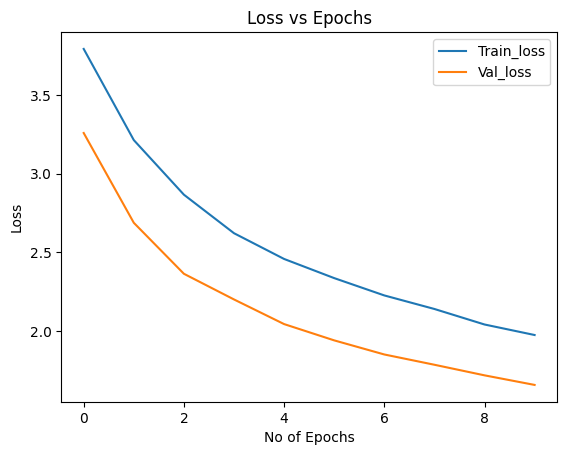

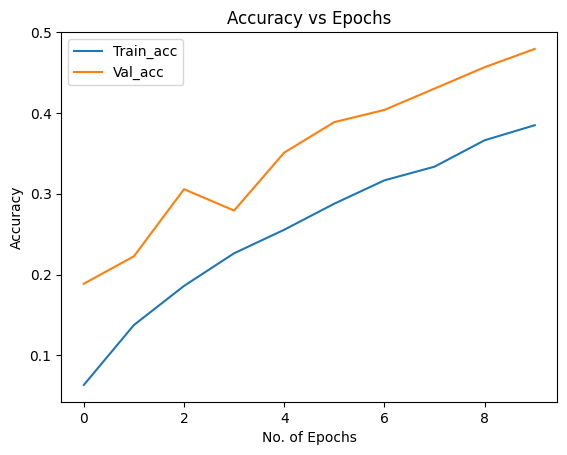

In [9]:
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


plt.plot(history.history['accuracy'],label = 'Train_acc')
plt.plot(history.history['val_accuracy'],label = 'Val_acc')
plt.legend()
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

In [10]:
test_data = ImageDataGenerator(rescale=1./255)
test_generator = test_data.flow_from_directory(test_path, target_size=(640, 640), batch_size=32, shuffle=False, class_mode="categorical")

Found 265 images belonging to 53 classes.


In [11]:
predictions = np.argmax(model.predict(test_generator), axis=1)
matrix = confusion_matrix(test_generator.labels, predictions)
report = classification_report(test_generator.labels, predictions, zero_division=0)
print("Classification Report:\n", report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.71      1.00      0.83         5
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         5
           4       0.40      0.40      0.40         5
           5       0.60      0.60      0.60         5
           6       1.00      0.40      0.57         5
           7       0.00      0.00      0.00         5
           8       0.14      0.20      0.17         5
           9       0.33      0.60      0.43         5
          10       0.30      0.60      0.40         5
          11       0.33      0.40      0.36         5
          12       0.14      0.20      0.17         5
          13       0.60      0.60      0.60         5
          14       1.00      0.40      0.57         5
          15       0.50      0.40      0.44         5
          16       0

In [12]:
pred = model.predict(test_generator,verbose=1)
test_generator_indices = np.argmax(pred,axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


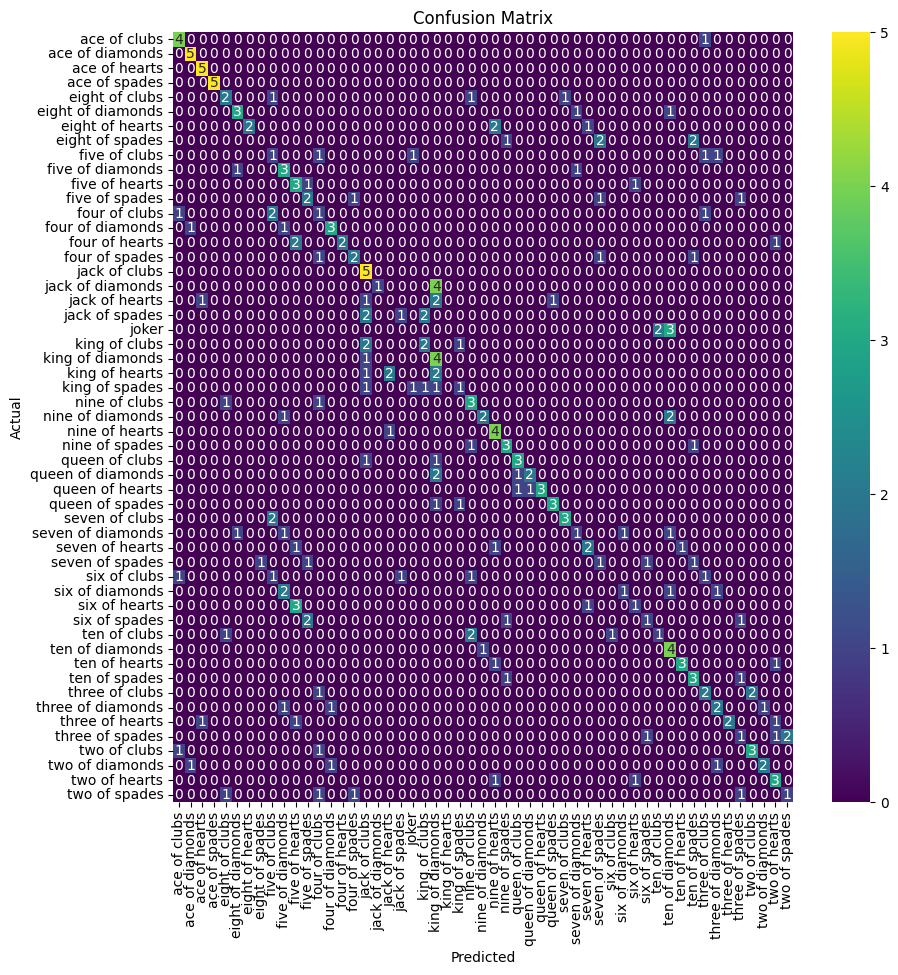

In [14]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(53) + 0.5, labels=test_generator.class_indices, rotation=90)
plt.yticks(ticks=np.arange(53) + 0.5, labels=test_generator.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)